In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
from scipy import stats
plt.rcParams['font.size'] = 18
#plt.rcParams['font.family'] = "serif"
tdir = 'in'
major = 5.0
minor = 3.0
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

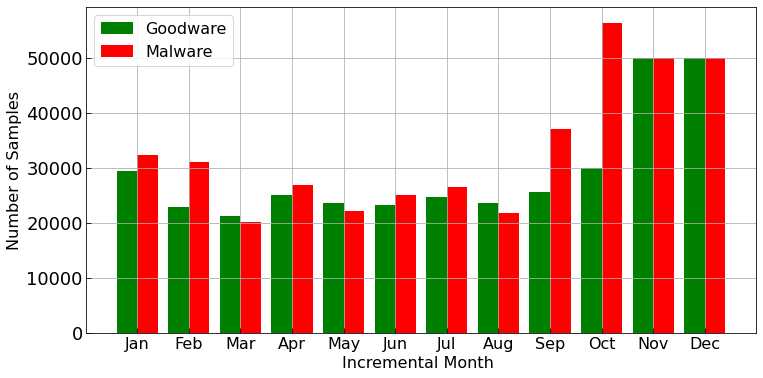

In [30]:
# 2018 data

good_samples = np.array([29423, 22915, 21373, 25190, 23719, 23285, 24799, 23634, 25707,
        29955, 50000, 50000])

mal_samples = np.array([32491, 31222, 20152, 26892, 22193, 25116, 26622, 21791, 37062,
        56459, 50000, 50000])


months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ind = np.array([0, 1, 2,3,4,5, 6, 7, 8, 9, 10, 11])

plt.figure(figsize=(12, 6))
plt.bar(ind-0.2, good_samples, 0.4, color='green',label = r'Goodware')
plt.bar(ind+0.2, mal_samples, 0.4, color='red', label = r'Malware',)


plt.legend(loc='best', fontsize=16)
plt.ylabel("Number of Samples", size=16)
plt.xlabel("Incremental Month ", size=16)
plt.xticks([0, 1, 2,3,4,5, 6, 7, 8, 9, 10, 11], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=16); 
plt.grid(True)
plt.savefig('./figures/ember_data_2018.png',
                bbox_inches='tight', 
               transparent=True);

In [19]:
def results_dict(lines, val):
    results = {'2018-01': [], '2018-02': [], '2018-03': [], '2018-04': [],
               '2018-05': [],'2018-06': [],'2018-07': [],'2018-08': [],
               '2018-09': [],'2018-10': [],'2018-11': [],'2018-12': []}
    
    if val == 'acc':
        ind = 3
    if val == 'rocauc':
        ind = 4
    if val == 'trtime':
        ind = 2
    if val == 'epoch':
        ind = 1
        
    for line in lines:
        l = line.split('\t')
        results[l[0]] += [float(l[ind])]
            
    res = [v for k, v in results.items()]
    res_mean_ = np.array([np.mean(v) for v in res])
    res_std_ = np.array([np.std(v) for v in res])    
    
    return res, res_mean_, res_std_

def get_plot_result_except_none_joint(results_dir, replay_sample):
    
    if results_dir == './pjr_saved_results_RANDOM_BUFFER/':
        results_file = results_dir + 'NOAVCLASS_VALID_PJR_replay_' + str(replay_sample) +\
                        '/results_accumulated_replay_' + str(replay_sample) + '_results.txt'

    else:
        results_file = results_dir + str(replay_sample) +\
                        '/results_accumulated_replay_' + str(replay_sample) + '_results.txt'
    print(results_file)
    with open(results_file) as f:
        lines = f.readlines()
        acc, acc_mean, acc_std = results_dict(lines, 'acc')
        rocauc, rocauc_mean, rocauc_std = results_dict(lines, 'rocauc')
        trtime, trtime_mean, trtime_std = results_dict(lines, 'trtime')
        epochs, epochs_mean, epochs_std = results_dict(lines, 'epoch')
    
    return acc, acc_mean, acc_std, rocauc, rocauc_mean, rocauc_std, trtime_mean*60, trtime_std*60, epochs_mean, epochs_std




none_accs, none_accs_mean, _, _, _, _, _, _, _, _ =\
            get_plot_result_except_none_joint('./pjr_saved_results_RANDOM_BUFFER/', 0.0)
r20_accs, r20_accs_mean, _, _, _, _, _, _, _, _ =\
            get_plot_result_except_none_joint('./pjr_saved_results_RANDOM_BUFFER/', 0.20)
r50_accs, r50_accs_mean, _, _, _, _, _, _, _, _ =\
            get_plot_result_except_none_joint('./pjr_saved_results_RANDOM_BUFFER/', 0.50)
joint_accs, joint_accs_mean, _, _, _, _, _, _, _, _ =\
            get_plot_result_except_none_joint('./pjr_saved_results_RANDOM_BUFFER/', 1.0)


fivehundred_acc_first, fivehundred_acc_mean_first, _, _, _, _, _, _, _, _ =\
            get_plot_result_except_none_joint('./saved_results_first/VALID_NEW_PJR_replay_', 500)

onek_acc_first, onek_acc_mean_first, _, _, _, _, _, _, _, _ =\
            get_plot_result_except_none_joint('./saved_results_first/VALID_NEW_PJR_replay_', 1000)

fivehundred_acc_last, fivehundred_acc_mean_last, _, _, _, _, _, _, _, _ =\
            get_plot_result_except_none_joint('./saved_results_last/VALID_NEW_PJR_replay_', 500)

onek_acc_last, onek_acc_mean_last, _, _, _, _, _, _, _, _ =\
            get_plot_result_except_none_joint('./saved_results_last/VALID_NEW_PJR_replay_', 1000)


./pjr_saved_results_RANDOM_BUFFER/NOAVCLASS_VALID_PJR_replay_0.0/results_accumulated_replay_0.0_results.txt
./pjr_saved_results_RANDOM_BUFFER/NOAVCLASS_VALID_PJR_replay_0.2/results_accumulated_replay_0.2_results.txt
./pjr_saved_results_RANDOM_BUFFER/NOAVCLASS_VALID_PJR_replay_0.5/results_accumulated_replay_0.5_results.txt
./pjr_saved_results_RANDOM_BUFFER/NOAVCLASS_VALID_PJR_replay_1.0/results_accumulated_replay_1.0_results.txt
./saved_results_first/VALID_NEW_PJR_replay_500/results_accumulated_replay_500_results.txt
./saved_results_first/VALID_NEW_PJR_replay_1000/results_accumulated_replay_1000_results.txt
./saved_results_last/VALID_NEW_PJR_replay_500/results_accumulated_replay_500_results.txt
./saved_results_last/VALID_NEW_PJR_replay_1000/results_accumulated_replay_1000_results.txt


In [20]:
print(f'0% : Mean {np.mean(none_accs_mean)} Std: {np.std(none_accs_mean)}')

print(f'20% : Mean {np.mean(r20_accs_mean)} Std: {np.std(r20_accs_mean)}')
print()
print(f'50% : Mean {np.mean(r50_accs_mean)} Std: {np.std(r50_accs_mean)}')
print()
print(f'100% : Mean {np.mean(joint_accs_mean)} Std: {np.std(joint_accs_mean)}')
print()
print(f'500 first : Mean {np.mean(fivehundred_acc_mean_first)} Std: {np.std(fivehundred_acc_mean_first)}')
print(f'500 last : Mean {np.mean(fivehundred_acc_mean_last)} Std: {np.std(fivehundred_acc_mean_last)}')
print()
print(f'1K first : Mean {np.mean(onek_acc_mean_first)} Std: {np.std(onek_acc_mean_first)}')
print(f'1K last : Mean {np.mean(onek_acc_mean_last)} Std: {np.std(onek_acc_mean_last)}')

0% : Mean 0.9237786403467414 Std: 0.010769493966906652
20% : Mean 0.9464046659120157 Std: 0.010148780916685963

50% : Mean 0.9524529532340318 Std: 0.010161136117872189

100% : Mean 0.957832052648668 Std: 0.009783989741293693

500 first : Mean 0.9531741796927933 Std: 0.010676506569507358
500 last : Mean 0.9515336357091115 Std: 0.006724664752065032

1K first : Mean 0.9576034420107855 Std: 0.01020079771424939
1K last : Mean 0.9554494862205155 Std: 0.00607043605641866


/home/mr6564/anaconda3/envs/PyTorch/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/mr6564/anaconda3/envs/PyTorch/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mr6564/anaconda3/envs/PyTorch/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/mr6564/anaconda3/envs/PyTorch/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mr6564/anaconda3/envs/PyTorch/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/mr6564/anaconda3/envs/PyTorch/lib/python3.7/site-packages/numpy/core/_methods.py:253: Ru

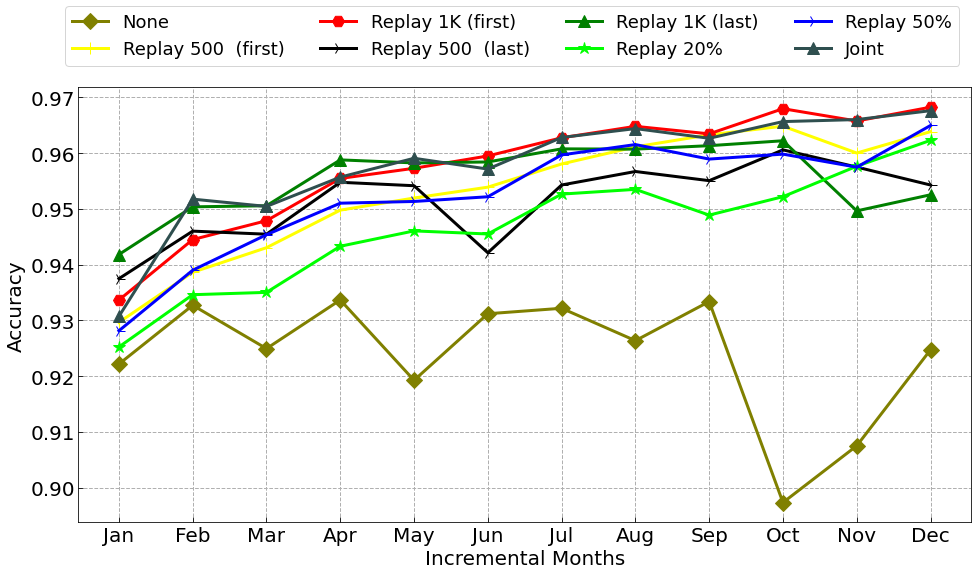

In [25]:
save_file_rocauc = 'NOAVCLASS_PJR_acc.png'

x_axis = np.array([i for i in range(12)])

plt.figure(figsize=(16, 8))

none_sem = [stats.sem(none_accs[i]) for i in range(len(none_accs))]
plt.fill_between(x_axis + [1], none_accs_mean-none_sem, none_accs_mean+none_sem, color='olive', alpha=0.2)
plt.plot(x_axis + [1],none_accs_mean, 'olive', marker= 'D', markersize=12, linewidth=3.0)



fivehundred_sem_first = [stats.sem(fivehundred_acc_first[i]) for i in range(len(fivehundred_acc_first))]
plt.fill_between(x_axis + [1], fivehundred_acc_mean_first-fivehundred_sem_first,\
                 fivehundred_acc_mean_first+fivehundred_sem_first, color='yellow', alpha=0.2)
plt.plot(x_axis + [1],fivehundred_acc_mean_first, 'yellow',marker= '+', markersize=12, linewidth=3.0)


onek_sem_first = [stats.sem(onek_acc_first[i]) for i in range(len(onek_acc_first))]
plt.fill_between(x_axis + [1], onek_acc_mean_first-onek_sem_first,\
                 onek_acc_mean_first+onek_sem_first, color='red', alpha=0.2)
plt.plot(x_axis + [1],onek_acc_mean_first, 'red',marker= 'H', markersize=12, linewidth=3.0)


fivehundred_sem_last = [stats.sem(fivehundred_acc_last[i]) for i in range(len(fivehundred_acc_last))]
plt.fill_between(x_axis + [1], fivehundred_acc_mean_last-fivehundred_sem_last,\
                 fivehundred_acc_mean_last+fivehundred_sem_last, color='black', alpha=0.2)
plt.plot(x_axis + [1],fivehundred_acc_mean_last, 'black',marker= '4', markersize=12, linewidth=3.0)


onek_sem_last = [stats.sem(onek_acc_last[i]) for i in range(len(onek_acc_last))]
plt.fill_between(x_axis + [1], onek_acc_mean_last-onek_sem_last,\
                 onek_acc_mean_last+onek_sem_last, color='green', alpha=0.2)
plt.plot(x_axis + [1],onek_acc_mean_last, 'green',marker= '^', markersize=12, linewidth=3.0)



r20_sem = [stats.sem(r20_accs[i]) for i in range(len(r20_accs))]
plt.fill_between(x_axis + [1], r20_accs_mean-r20_sem, r20_accs_mean+r20_sem, color='lime', alpha=0.2)
plt.plot(x_axis + [1],r20_accs_mean, 'lime',marker= '*', markersize=12, linewidth=3.0)


r50_sem = [stats.sem(r50_accs[i]) for i in range(len(r50_accs))]
plt.fill_between(x_axis + [1], r50_accs_mean-r50_sem, r50_accs_mean+r50_sem, color='black', alpha=0.2)
plt.plot(x_axis + [1],r50_accs_mean, 'blue',marker= '4', markersize=12, linewidth=3.0)



joint_sem = [stats.sem(joint_accs[i]) for i in range(len(joint_accs))]
plt.fill_between(x_axis + [1], joint_accs_mean-joint_sem, joint_accs_mean+joint_sem, color='green', alpha=0.2)
plt.plot(x_axis + [1],joint_accs_mean, 'darkslategrey',marker= '^', markersize=12, linewidth=3.0);


plt.legend(
           ['None', 'Replay 500  (first)', 'Replay 1K (first)',\
            'Replay 500  (last)', 'Replay 1K (last)',
            'Replay 20%', 'Replay 50%', 'Joint'],\
          ncol=4, loc=(-0.015, 1.05))


plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Incremental Months', fontsize=20)
plt.xticks([1, 2,3,4,5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr',\
                                                  'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=20) 
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', linewidth=1.)

plt.savefig('./figures/' + save_file_rocauc, bbox_inches='tight', transparent=True);

In [ ]:
print(f'20% : Mean {np.mean(r20_accs_mean)} Std: {np.std(r20_accs_mean)}')
print(f'100 : Mean {np.mean(onehundred_acc_mean)} Std: {np.std(onehundred_acc_mean)}')
print()
print(f'50% : Mean {np.mean(r50_accs_mean)} Std: {np.std(r50_accs_mean)}')
print(f'500 : Mean {np.mean(fivehundred_acc_mean)} Std: {np.std(fivehundred_acc_mean)}')
print(f'1K : Mean {np.mean(onek_acc_mean)} Std: {np.std(onek_acc_mean)}')

In [ ]:
save_file_rocauc = 'PJR_Sub_acc.png'


x_axis = np.array([i for i in range(12)])

plt.figure(figsize=(16, 8))


onehundred_sem = [stats.sem(onehundred_acc[i]) for i in range(len(onehundred_acc))]
plt.fill_between(x_axis + [1], onehundred_acc_mean-onehundred_sem, onehundred_acc_mean+onehundred_sem, color='cornflowerblue', alpha=0.2)
plt.plot(x_axis + [1],onehundred_acc_mean, 'cornflowerblue',marker= 'p', markersize=12, linewidth=3.0)


twohundred_sem = [stats.sem(twohundred_acc[i]) for i in range(len(twohundred_acc))]
plt.fill_between(x_axis + [1], twohundred_acc_mean-twohundred_sem, twohundred_acc_mean+twohundred_sem, color='violet', alpha=0.2)
plt.plot(x_axis + [1],twohundred_acc_mean, 'violet',marker= 'X', markersize=12, linewidth=3.0)


fivehundred_sem = [stats.sem(fivehundred_acc[i]) for i in range(len(fivehundred_acc))]
plt.fill_between(x_axis + [1], fivehundred_acc_mean-onehundred_sem, fivehundred_acc_mean+fivehundred_sem, color='purple', alpha=0.2)
plt.plot(x_axis + [1],fivehundred_acc_mean, 'purple',marker= 'o', markersize=12, linewidth=3.0)


onek_sem = [stats.sem(onek_acc[i]) for i in range(len(onek_acc))]
plt.fill_between(x_axis + [1], onek_acc_mean-onek_sem, onek_acc_mean+onek_sem, color='blue', alpha=0.2)
plt.plot(x_axis + [1],onek_acc_mean, 'blue',marker= 'D', markersize=12, linewidth=3.0)

fivek_sem = [stats.sem(fivek_acc[i]) for i in range(len(fivek_acc))]
plt.fill_between(x_axis + [1], fivek_acc_mean-fivek_sem, fivek_acc_mean+fivek_sem, color='yellow', alpha=0.2)
plt.plot(x_axis + [1],fivek_acc_mean, 'yellow',marker= '+', markersize=12, linewidth=3.0)


tenk_sem = [stats.sem(tenk_acc[i]) for i in range(len(tenk_acc))]
plt.fill_between(x_axis + [1], tenk_acc_mean-tenk_sem, tenk_acc_mean+tenk_sem, color='red', alpha=0.2)
plt.plot(x_axis + [1],tenk_acc_mean, 'red',marker= 'H', markersize=12, linewidth=3.0)

r20_sem = [stats.sem(r20_accs[i]) for i in range(len(r20_accs))]
plt.fill_between(x_axis + [1], r20_accs_mean-r20_sem, r20_accs_mean+r20_sem, color='lime', alpha=0.2)
plt.plot(x_axis + [1],r20_accs_mean, 'lime',marker= '*', markersize=12, linewidth=3.0)


r50_sem = [stats.sem(r50_accs[i]) for i in range(len(r50_accs))]
plt.fill_between(x_axis + [1], r50_accs_mean-r50_sem, r50_accs_mean+r50_sem, color='black', alpha=0.2)
plt.plot(x_axis + [1],r50_accs_mean, 'black',marker= '4', markersize=12, linewidth=3.0)



joint_sem = [stats.sem(joint_accs[i]) for i in range(len(joint_accs))]
plt.fill_between(x_axis + [1], joint_accs_mean-joint_sem, joint_accs_mean+joint_sem, color='green', alpha=0.2)
plt.plot(x_axis + [1],joint_accs_mean, 'green',marker= '^', markersize=12, linewidth=3.0)

plt.legend(
           ['Replay 100', 'Replay 200', 'Replay 500',\
            'Replay 1K','Replay 5K','Replay 10K', 'Replay 20%', 'Replay 50%', 'Joint'],\
          ncol=5, loc=(-0.015, 1.05))


plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Incremental Months', fontsize=20)
plt.xticks([1, 2,3,4,5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr',\
                                                  'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=20) 
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', linewidth=1.)
plt.savefig('./figures/' + save_file_rocauc,
                bbox_inches='tight', 
               transparent=True);

In [21]:
onehundred_acc_first, onehundred_acc_mean_first, _, _, _, _, _, _, _, _ =\
            get_plot_result_except_none_joint('./saved_results_first/', 100)


fivehundred_acc_first, fivehundred_acc_mean_first, _, _, _, _, _, _, _, _ =\
            get_plot_result_except_none_joint('./saved_results_first/', 500)

onek_acc_first, onek_acc_mean_first, _, _, _, _, _, _, _, _ =\
            get_plot_result_except_none_joint('./saved_results_first/', 1000)
print()
print()
print(f'20% : Mean {np.mean(r20_accs_mean)} Std: {np.std(r20_accs_mean)}')
print(f'100 : Mean {np.mean(onehundred_acc_mean)} Std: {np.std(onehundred_acc_mean)}')
print(f'100 first : Mean {np.mean(onehundred_acc_mean_first)} Std: {np.std(onehundred_acc_mean_first)}')
print()
print(f'50% : Mean {np.mean(r50_accs_mean)} Std: {np.std(r50_accs_mean)}')
print(f'500 : Mean {np.mean(fivehundred_acc_mean)} Std: {np.std(fivehundred_acc_mean)}')
print(f'500 first : Mean {np.mean(fivehundred_acc_mean_first)} Std: {np.std(fivehundred_acc_mean_first)}')
print(f'1K : Mean {np.mean(onek_acc_mean)} Std: {np.std(onek_acc_mean)}')
print(f'1K first : Mean {np.mean(onek_acc_mean_first)} Std: {np.std(onek_acc_mean_first)}')

./saved_results_first/NEW_PJR_replay_100/results_accumulated_replay_100_results.txt
./saved_results_first/NEW_PJR_replay_500/results_accumulated_replay_500_results.txt
./saved_results_first/NEW_PJR_replay_1000/results_accumulated_replay_1000_results.txt


20% : Mean 0.9437858946674608 Std: 0.009800642031906977
100 : Mean 0.9471804411995425 Std: 0.007895343525265842
100 first : Mean 0.9437915158541449 Std: 0.006842724770512592

50% : Mean 0.9501975273043196 Std: 0.011466620233806207
500 : Mean 0.9514312383142532 Std: 0.00982349234133924
500 first : Mean 0.9512070234423886 Std: 0.009785930682639334
1K : Mean 0.9528709056693835 Std: 0.00960498482375186
1K first : Mean 0.9525697109895969 Std: 0.010247218416928099


In [22]:
onehundred_acc_last, onehundred_acc_mean_last, _, _, _, _, _, _, _, _ =\
            get_plot_result_except_none_joint('./saved_results_last/', 100)



fivehundred_acc_last, fivehundred_acc_mean_last, _, _, _, _, _, _, _, _ =\
            get_plot_result_except_none_joint('./saved_results_last/', 500)

onek_acc_last, onek_acc_mean_last, _, _, _, _, _, _, _, _ =\
            get_plot_result_except_none_joint('./saved_results_last/', 1000)
print()
print()
print(f'20% : Mean {np.mean(r20_accs_mean)} Std: {np.std(r20_accs_mean)}')
print(f'100 : Mean {np.mean(onehundred_acc_mean)} Std: {np.std(onehundred_acc_mean)}')
print(f'100 first : Mean {np.mean(onehundred_acc_mean_first)} Std: {np.std(onehundred_acc_mean_first)}')
print(f'100 last : Mean {np.mean(onehundred_acc_mean_last)} Std: {np.std(onehundred_acc_mean_last)}')
print()
print(f'50% : Mean {np.mean(r50_accs_mean)} Std: {np.std(r50_accs_mean)}')
print(f'500 : Mean {np.mean(fivehundred_acc_mean)} Std: {np.std(fivehundred_acc_mean)}')
print(f'500 first : Mean {np.mean(fivehundred_acc_mean_first)} Std: {np.std(fivehundred_acc_mean_first)}')
print(f'500 last : Mean {np.mean(fivehundred_acc_mean_last)} Std: {np.std(fivehundred_acc_mean_last)}')
print()
print(f'1K : Mean {np.mean(onek_acc_mean)} Std: {np.std(onek_acc_mean)}')
print(f'1K first : Mean {np.mean(onek_acc_mean_first)} Std: {np.std(onek_acc_mean_first)}')
print(f'1K last : Mean {np.mean(onek_acc_mean_last)} Std: {np.std(onek_acc_mean_last)}')


./saved_results_last/NEW_PJR_replay_100/results_accumulated_replay_100_results.txt
./saved_results_last/NEW_PJR_replay_500/results_accumulated_replay_500_results.txt
./saved_results_last/NEW_PJR_replay_1000/results_accumulated_replay_1000_results.txt


20% : Mean 0.9437858946674608 Std: 0.009800642031906977
100 : Mean 0.9471804411995425 Std: 0.007895343525265842
100 first : Mean 0.9437915158541449 Std: 0.006842724770512592
100 last : Mean 0.9430066229423247 Std: 0.006166725564339639

50% : Mean 0.9501975273043196 Std: 0.011466620233806207
500 : Mean 0.9514312383142532 Std: 0.00982349234133924
500 first : Mean 0.9512070234423886 Std: 0.009785930682639334
500 last : Mean 0.9483019732750333 Std: 0.008079957500533905

1K : Mean 0.9528709056693835 Std: 0.00960498482375186
1K first : Mean 0.9525697109895969 Std: 0.010247218416928099
1K last : Mean 0.9520818179590355 Std: 0.008078732411118608
